<a href="https://colab.research.google.com/github/syedanida/deep-learning-multimodal-colabs/blob/main/9_TensorFlow_Image_to_Image_and_Inpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Text-Guided Image-to-Image and Inpainting

In [2]:
!pip install -q tensorflow tensorflow_hub opencv-python

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw
import requests
import io

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw
import requests
import io


In [5]:
# Text-guided image editing simulation
def text_guided_edit(image, mask, prompt):
    """Simulate text-guided image editing."""
    blurred = cv2.GaussianBlur(image, (21, 21), 0)

    # Blend based on mask
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) / 255.0
    result = image * (1 - mask_3channel) + blurred * mask_3channel

    # Add text overlay to show the prompt
    result_with_text = result.copy()
    cv2.putText(result_with_text, f"Edit: {prompt}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return result.astype(np.uint8), result_with_text.astype(np.uint8)

In [6]:
# Load sample image
image_url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"
response = requests.get(image_url)
image = np.array(Image.open(io.BytesIO(response.content)))
image = cv2.resize(image, (512, 512))

In [7]:
# Create different masks for demonstration
# Mask 1: Rectangle in the center
mask1_coords = [[150, 150], [350, 150], [350, 350], [150, 350]]
mask1 = create_mask(image.shape, mask1_coords)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
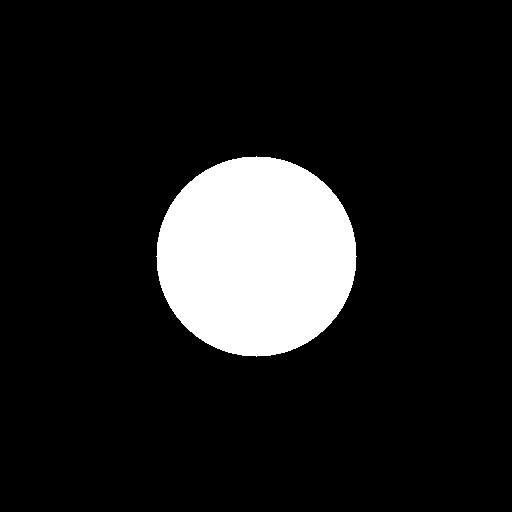

In [8]:
# Mask 2: Circle
mask2 = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.circle(mask2, (256, 256), 100, 255, -1)

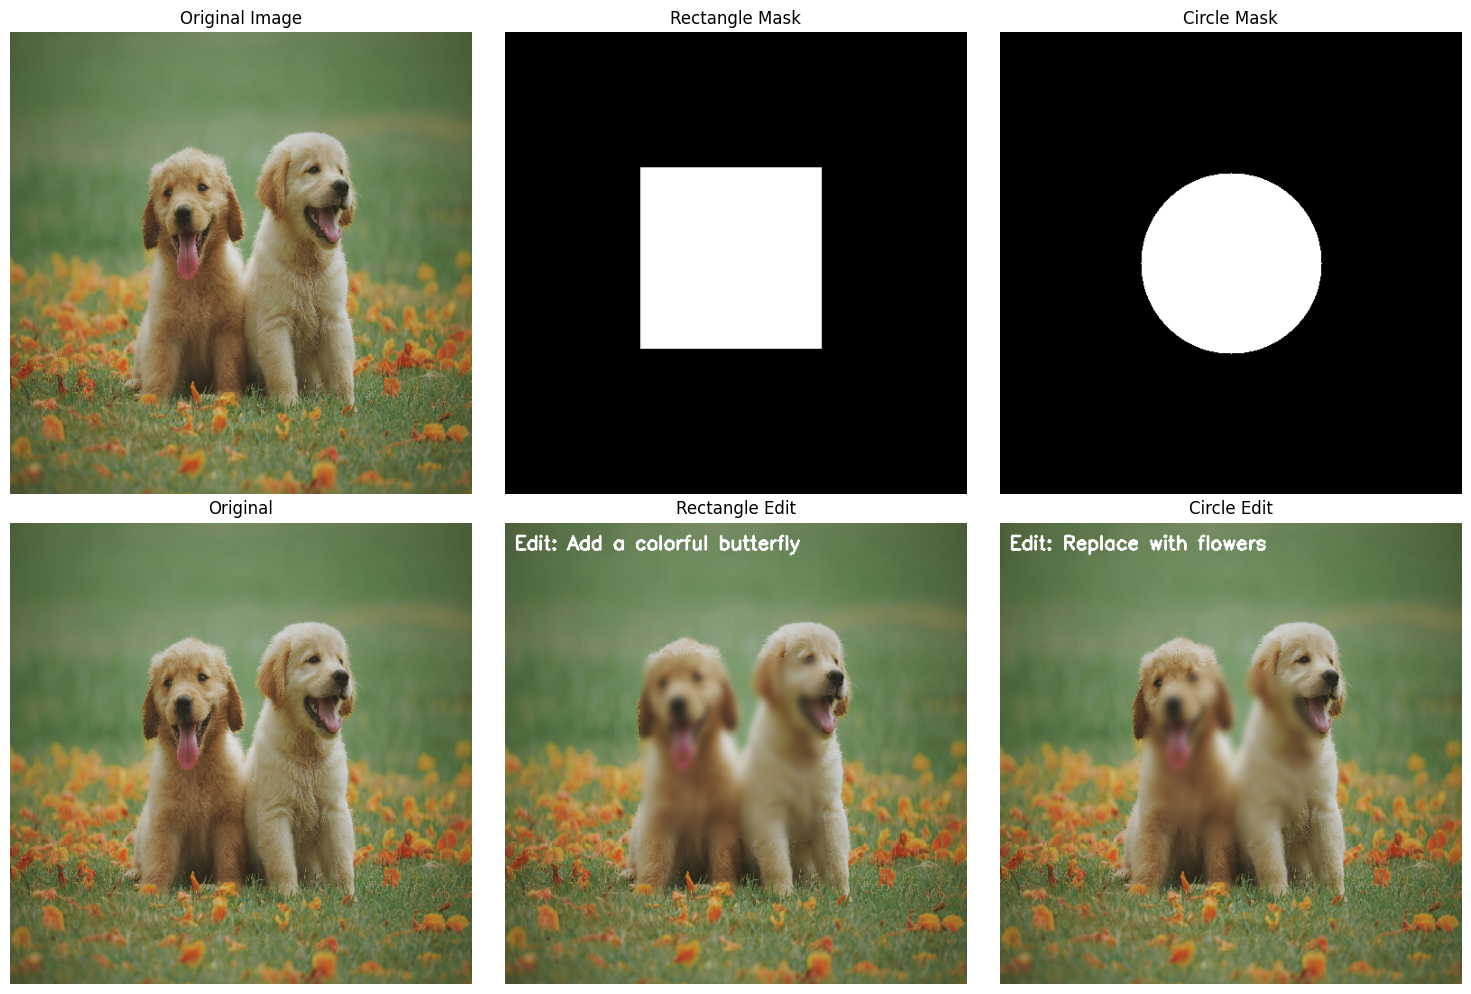

In [9]:
# Demonstrate inpainting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Show masks
axes[0, 1].imshow(mask1, cmap='gray')
axes[0, 1].set_title("Rectangle Mask")
axes[0, 1].axis('off')

axes[0, 2].imshow(mask2, cmap='gray')
axes[0, 2].set_title("Circle Mask")
axes[0, 2].axis('off')

# Apply text-guided edits
edit1, edit1_text = text_guided_edit(image, mask1, "Add a colorful butterfly")
edit2, edit2_text = text_guided_edit(image, mask2, "Replace with flowers")

axes[1, 0].imshow(image)
axes[1, 0].set_title("Original")
axes[1, 0].axis('off')

axes[1, 1].imshow(edit1_text)
axes[1, 1].set_title("Rectangle Edit")
axes[1, 1].axis('off')

axes[1, 2].imshow(edit2_text)
axes[1, 2].set_title("Circle Edit")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Style transfer as image-to-image translation
# Load style transfer model
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

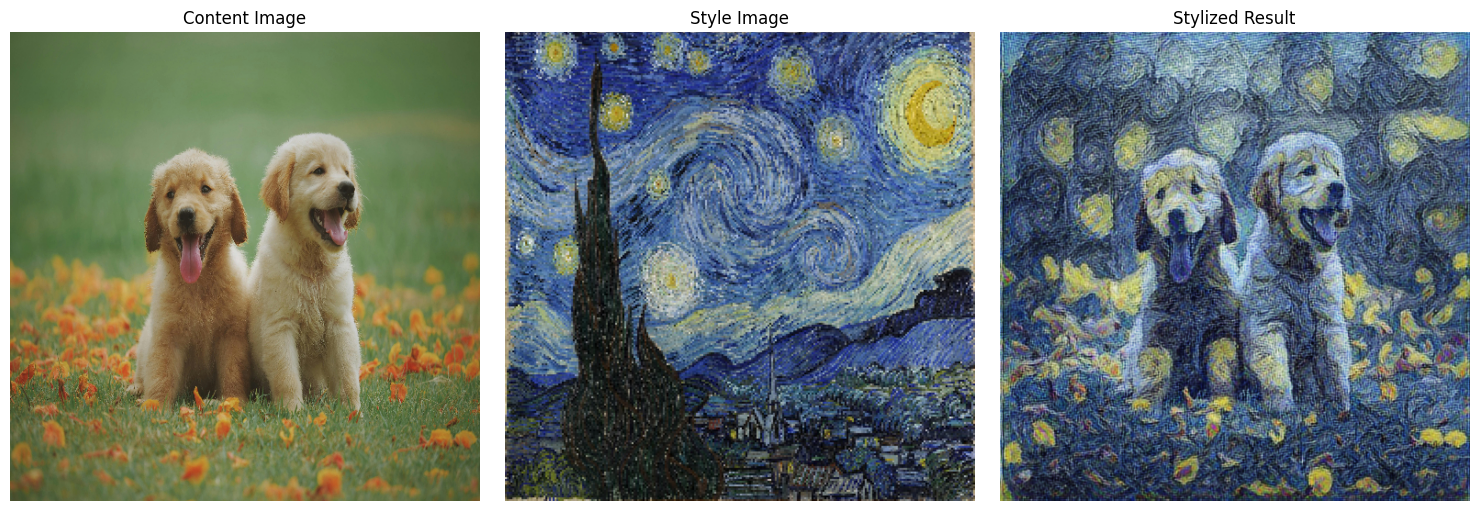

In [11]:
# Load style image
style_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
style_response = requests.get(style_url)
style_image = np.array(Image.open(io.BytesIO(style_response.content)))
style_image = cv2.resize(style_image, (256, 256))

# Prepare images for style transfer
content_image = tf.constant(np.expand_dims(image, 0), dtype=tf.float32) / 255.0
style_image_tf = tf.constant(np.expand_dims(style_image, 0), dtype=tf.float32) / 255.0

# Apply style transfer
stylized_image = style_transfer_model(content_image, style_image_tf)[0]
stylized_image = np.array(stylized_image * 255).astype(np.uint8)[0]

# Display style transfer results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Content Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(style_image)
plt.title("Style Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stylized_image)
plt.title("Stylized Result")
plt.axis('off')
plt.tight_layout()
plt.show()

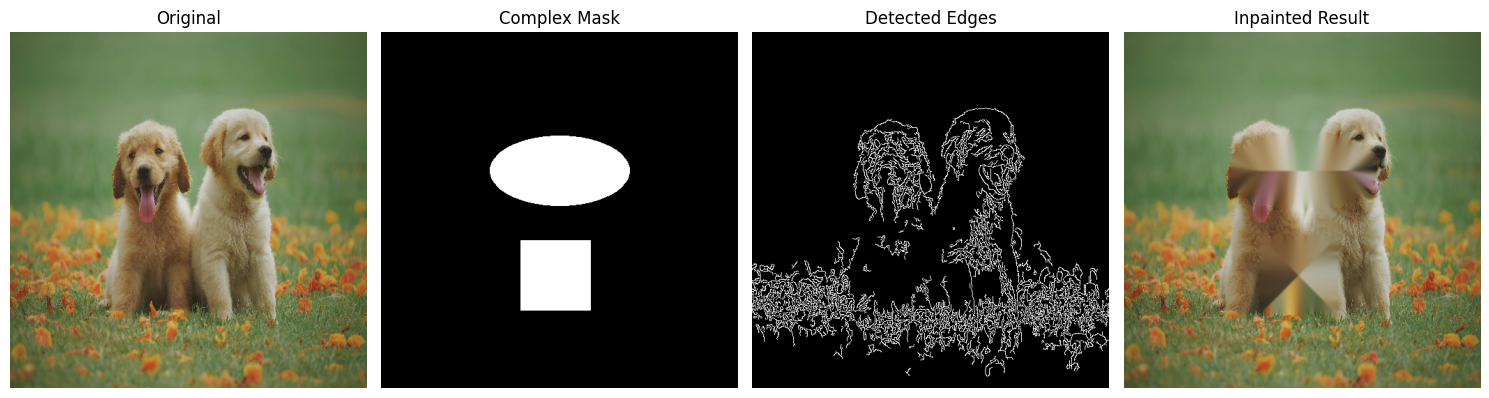

TensorFlow image-to-image and inpainting demonstration complete!


In [12]:
# Advanced inpainting with edge-aware processing
def edge_aware_inpaint(image, mask):
    """Perform edge-aware inpainting."""
    # Detect edges
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    # Dilate mask to include edges
    kernel = np.ones((5, 5), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=2)

    # Inpaint using OpenCV
    result = cv2.inpaint(image, dilated_mask, 3, cv2.INPAINT_TELEA)

    return result, edges

# Create a more complex mask
complex_mask = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.ellipse(complex_mask, (256, 200), (100, 50), 0, 0, 360, 255, -1)
cv2.rectangle(complex_mask, (200, 300), (300, 400), 255, -1)

# Apply edge-aware inpainting
inpainted, edges = edge_aware_inpaint(image, complex_mask)

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(complex_mask, cmap='gray')
plt.title("Complex Mask")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title("Detected Edges")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(inpainted)
plt.title("Inpainted Result")
plt.axis('off')
plt.tight_layout()
plt.show()

print("TensorFlow image-to-image and inpainting demonstration complete!")
